# 1. Read the Data
<a id="1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import  MinMaxScaler


from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression



In [4]:
df = pd.read_csv('winequality-red.csv')

df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 1599 rows and 12 columns.


In [6]:
print(f'The dataset has {df.isna().sum().sum()} null values.')

The dataset has 0 null values.


Let's have a look at the duplicate rows.

Among the set of duplicate rows, there are 'multiple' duplicates, i.e. rows that have more than a copy. For example, see rows 1563, 1564 and 1567.

Let's keep only a single copy of the duplicate rows.

In [7]:
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
df2 = df.drop_duplicates()
X = df2.drop("quality", axis=1)
y = df2["quality"]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1359 non-null   float64
 1   volatile_acidity      1359 non-null   float64
 2   citric_acid           1359 non-null   float64
 3   residual_sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free_sulfur_dioxide   1359 non-null   float64
 6   total_sulfur_dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   ph                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
dtypes: float64(11)
memory usage: 127.4 KB


rescaling the data for better visualization and for other algorithms

In [8]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.247788          0.397260         0.00        0.068493   0.106845   
1          0.283186          0.520548         0.00        0.116438   0.143573   
2          0.283186          0.438356         0.04        0.095890   0.133556   
3          0.584071          0.109589         0.56        0.068493   0.105175   
4          0.247788          0.369863         0.00        0.061644   0.105175   
...             ...               ...          ...             ...        ...   
1354       0.194690          0.342466         0.08        0.068493   0.093489   
1355       0.141593          0.328767         0.08        0.075342   0.130217   
1356       0.115044          0.294521         0.10        0.089041   0.083472   
1357       0.115044          0.359589         0.12        0.075342   0.105175   
1358       0.123894          0.130137         0.47        0.184932   0.091820   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
0                0.140845              0.098940  0.567548  0.606299   
1                0.338028              0.215548  0.494126  0.362205   
2                0.197183              0.169611  0.508811  0.409449   
3                0.225352              0.190813  0.582232  0.330709   
4                0.169014              0.120141  0.567548  0.606299   
...                   ...                   ...       ...       ...   
1354             0.380282              0.113074  0.472834  0.535433   
1355             0.436620              0.134276  0.354626  0.559055   
1356             0.535211              0.159011  0.370778  0.614173   
1357             0.436620              0.134276  0.396476  0.653543   
1358             0.239437              0.127208  0.397944  0.511811   

      sulphates   alcohol  
0      0.137725  0.153846  
1      0.209581  0.215385  
2      0.191617  0.215385  
3      0.149701  0.215385  
4      0.137725  0.153846  
...         ...       ...  
1354   0.293413  0.169231  
1355   0.149701  0.323077  
1356   0.257485  0.430769  
1357   0.227545  0.276923  
1358   0.197605  0.400000  

[1359 rows x 11 columns]

They are 204. Now, I am dropping all the duplicates. I am retaining only the first occurrence of them.

Below, I am printing the columns' data types to see if they match the expectations. They should be all of numeric type.

In [9]:
X.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
dtype: object

Finally, I am having a look at the basic stats of the data.

In [10]:
X.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        0.328371          0.280464     0.272333        0.111192   
std         0.153716          0.125364     0.195537        0.092624   
min         0.000000          0.000000     0.000000        0.000000   
25%         0.221239          0.184932     0.090000        0.068493   
50%         0.292035          0.273973     0.260000        0.089041   
75%         0.407080          0.356164     0.430000        0.116438   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.127085             0.209765              0.144261     0.487441   
std       0.082432             0.147145              0.118053     0.137219   
min       0.000000             0.000000              0.000000     0.000000   
25%       0.096828             0.084507              0.056537     0.406021   
50%       0.111853             0.183099              0.113074     0.486784   
75%       0.131886             0.281690              0.201413     0.569016   
max       1.000000             1.000000              1.000000     1.000000   

                ph    sulphates      alcohol  
count  1359.000000  1359.000000  1359.000000  
mean      0.448651     0.196829     0.312664  
std       0.122076     0.102196     0.166472  
min       0.000000     0.000000     0.000000  
25%       0.370079     0.131737     0.169231  
50%       0.448819     0.173653     0.276923  
75%       0.519685     0.239521     0.415385  
max       1.000000     1.000000     1.000000

The minimum and maximum values of all the features seem reasonable. We do not have either negative or huge values.

# 2. Exploratory Data Analysis
<a id = "2"></a>

## 2.1 Histograms of the Variables

I am plotting the histograms of all the variables.

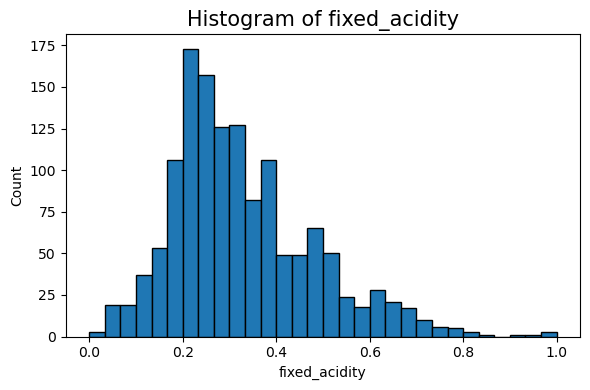

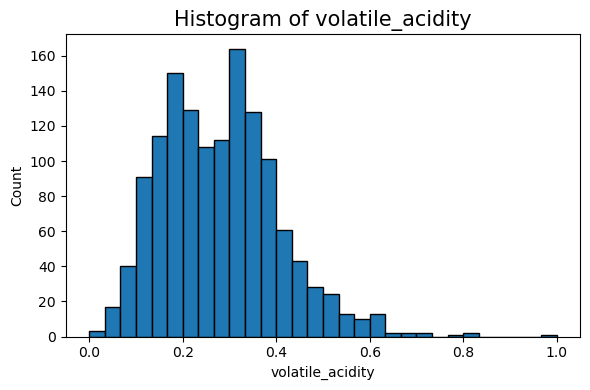

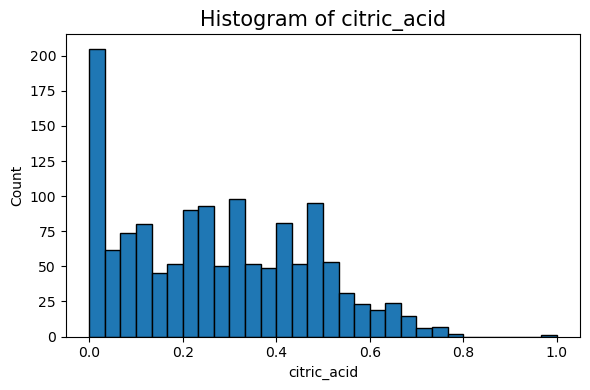

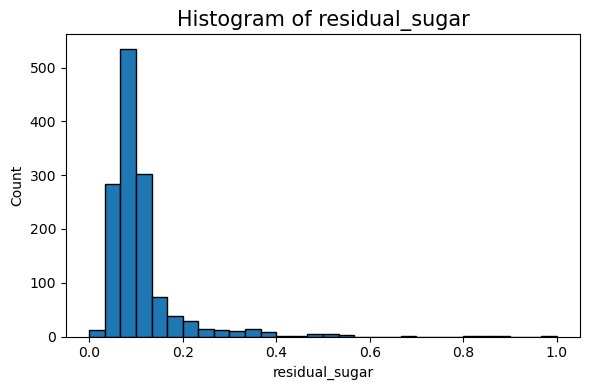

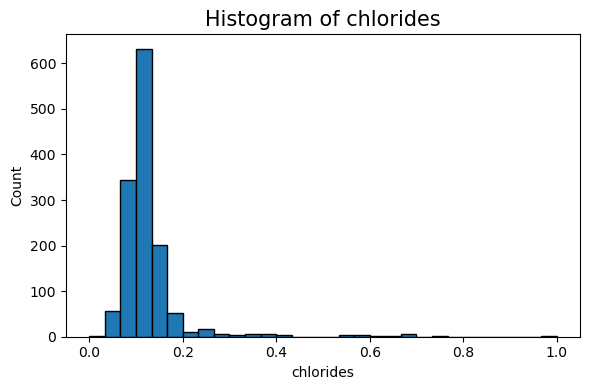

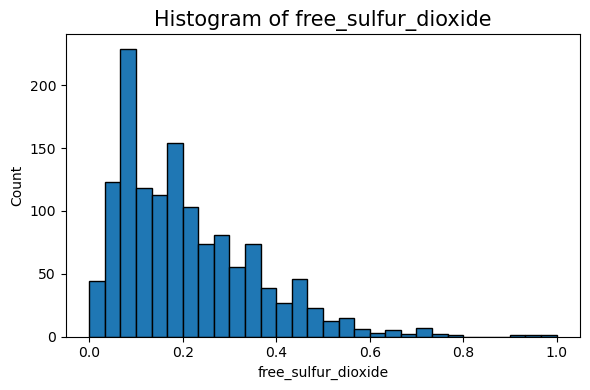

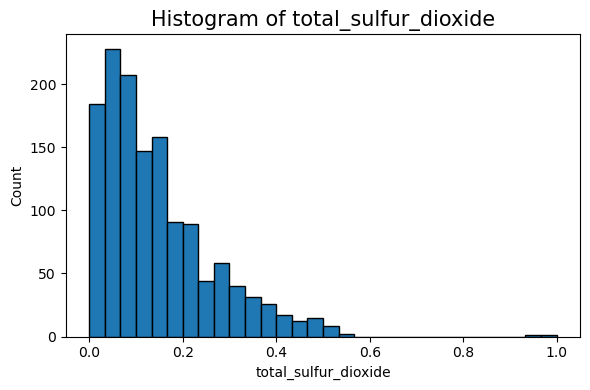

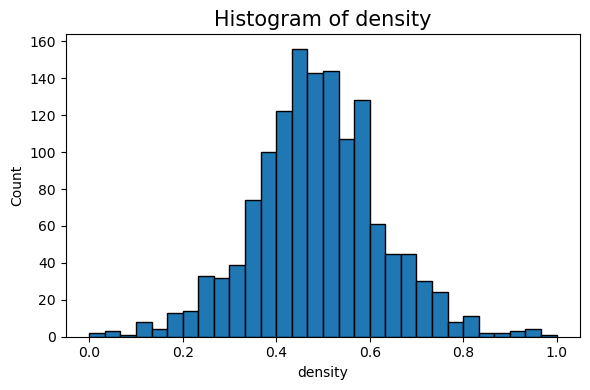

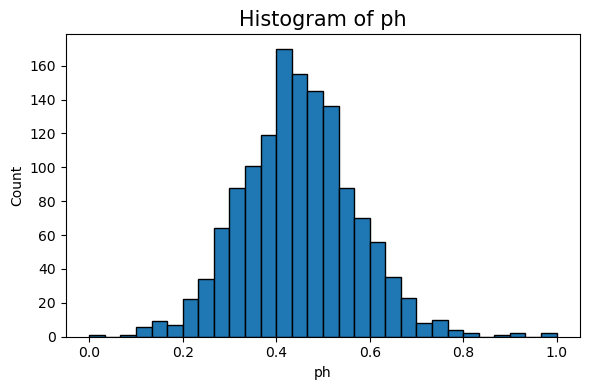

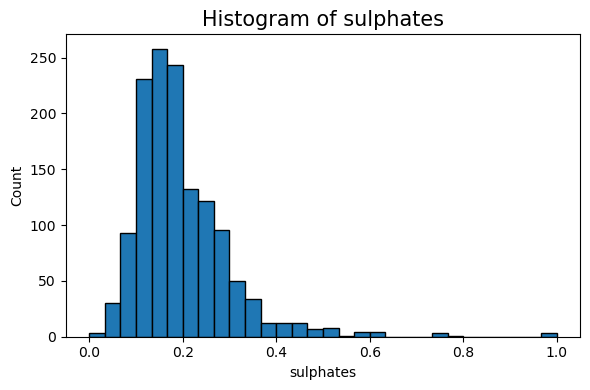

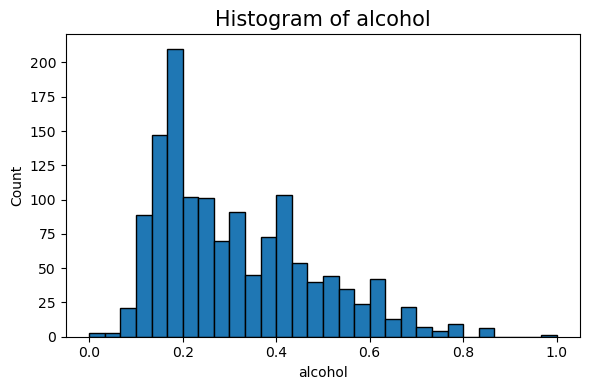

In [11]:
features = [col for col in X.columns]

def plot_histograms(X, features):
    for col in features:
        plt.figure(figsize=(6, 4))
        plt.hist(X[col], bins=30, edgecolor='k')
        plt.title(f'Histogram of {col}', fontsize=15)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

plot_histograms(X, features)


The last histogram, that of quality (the target variable), shows that the target classes are highly imbalanced. Dealing with rare classes in the target variable may be necessary during the classification stage in order to avoid their misclassification.

Then, I am calculating the variables' skewness and kurtosis. 

One can notice that some of the variables (like `density` and `PH`) are almost Gaussian-shaped, some of them are in an intermediate situation (like `sulphates` and `total sulfur dioxide`), while other variables have strong skewness and/or kurtosis (see the distributions of `residual sugar` and `chlorides`). This means that such variables are supposed to have a non-negligible number of outliers. 

These outliers can affect the classification model results. This means that the skewed variables either need to be transformed (in order to resemble more regular curves) or their outliers must be capped or dropped.

I now implement this dataset's features,l using scatterplot matrix

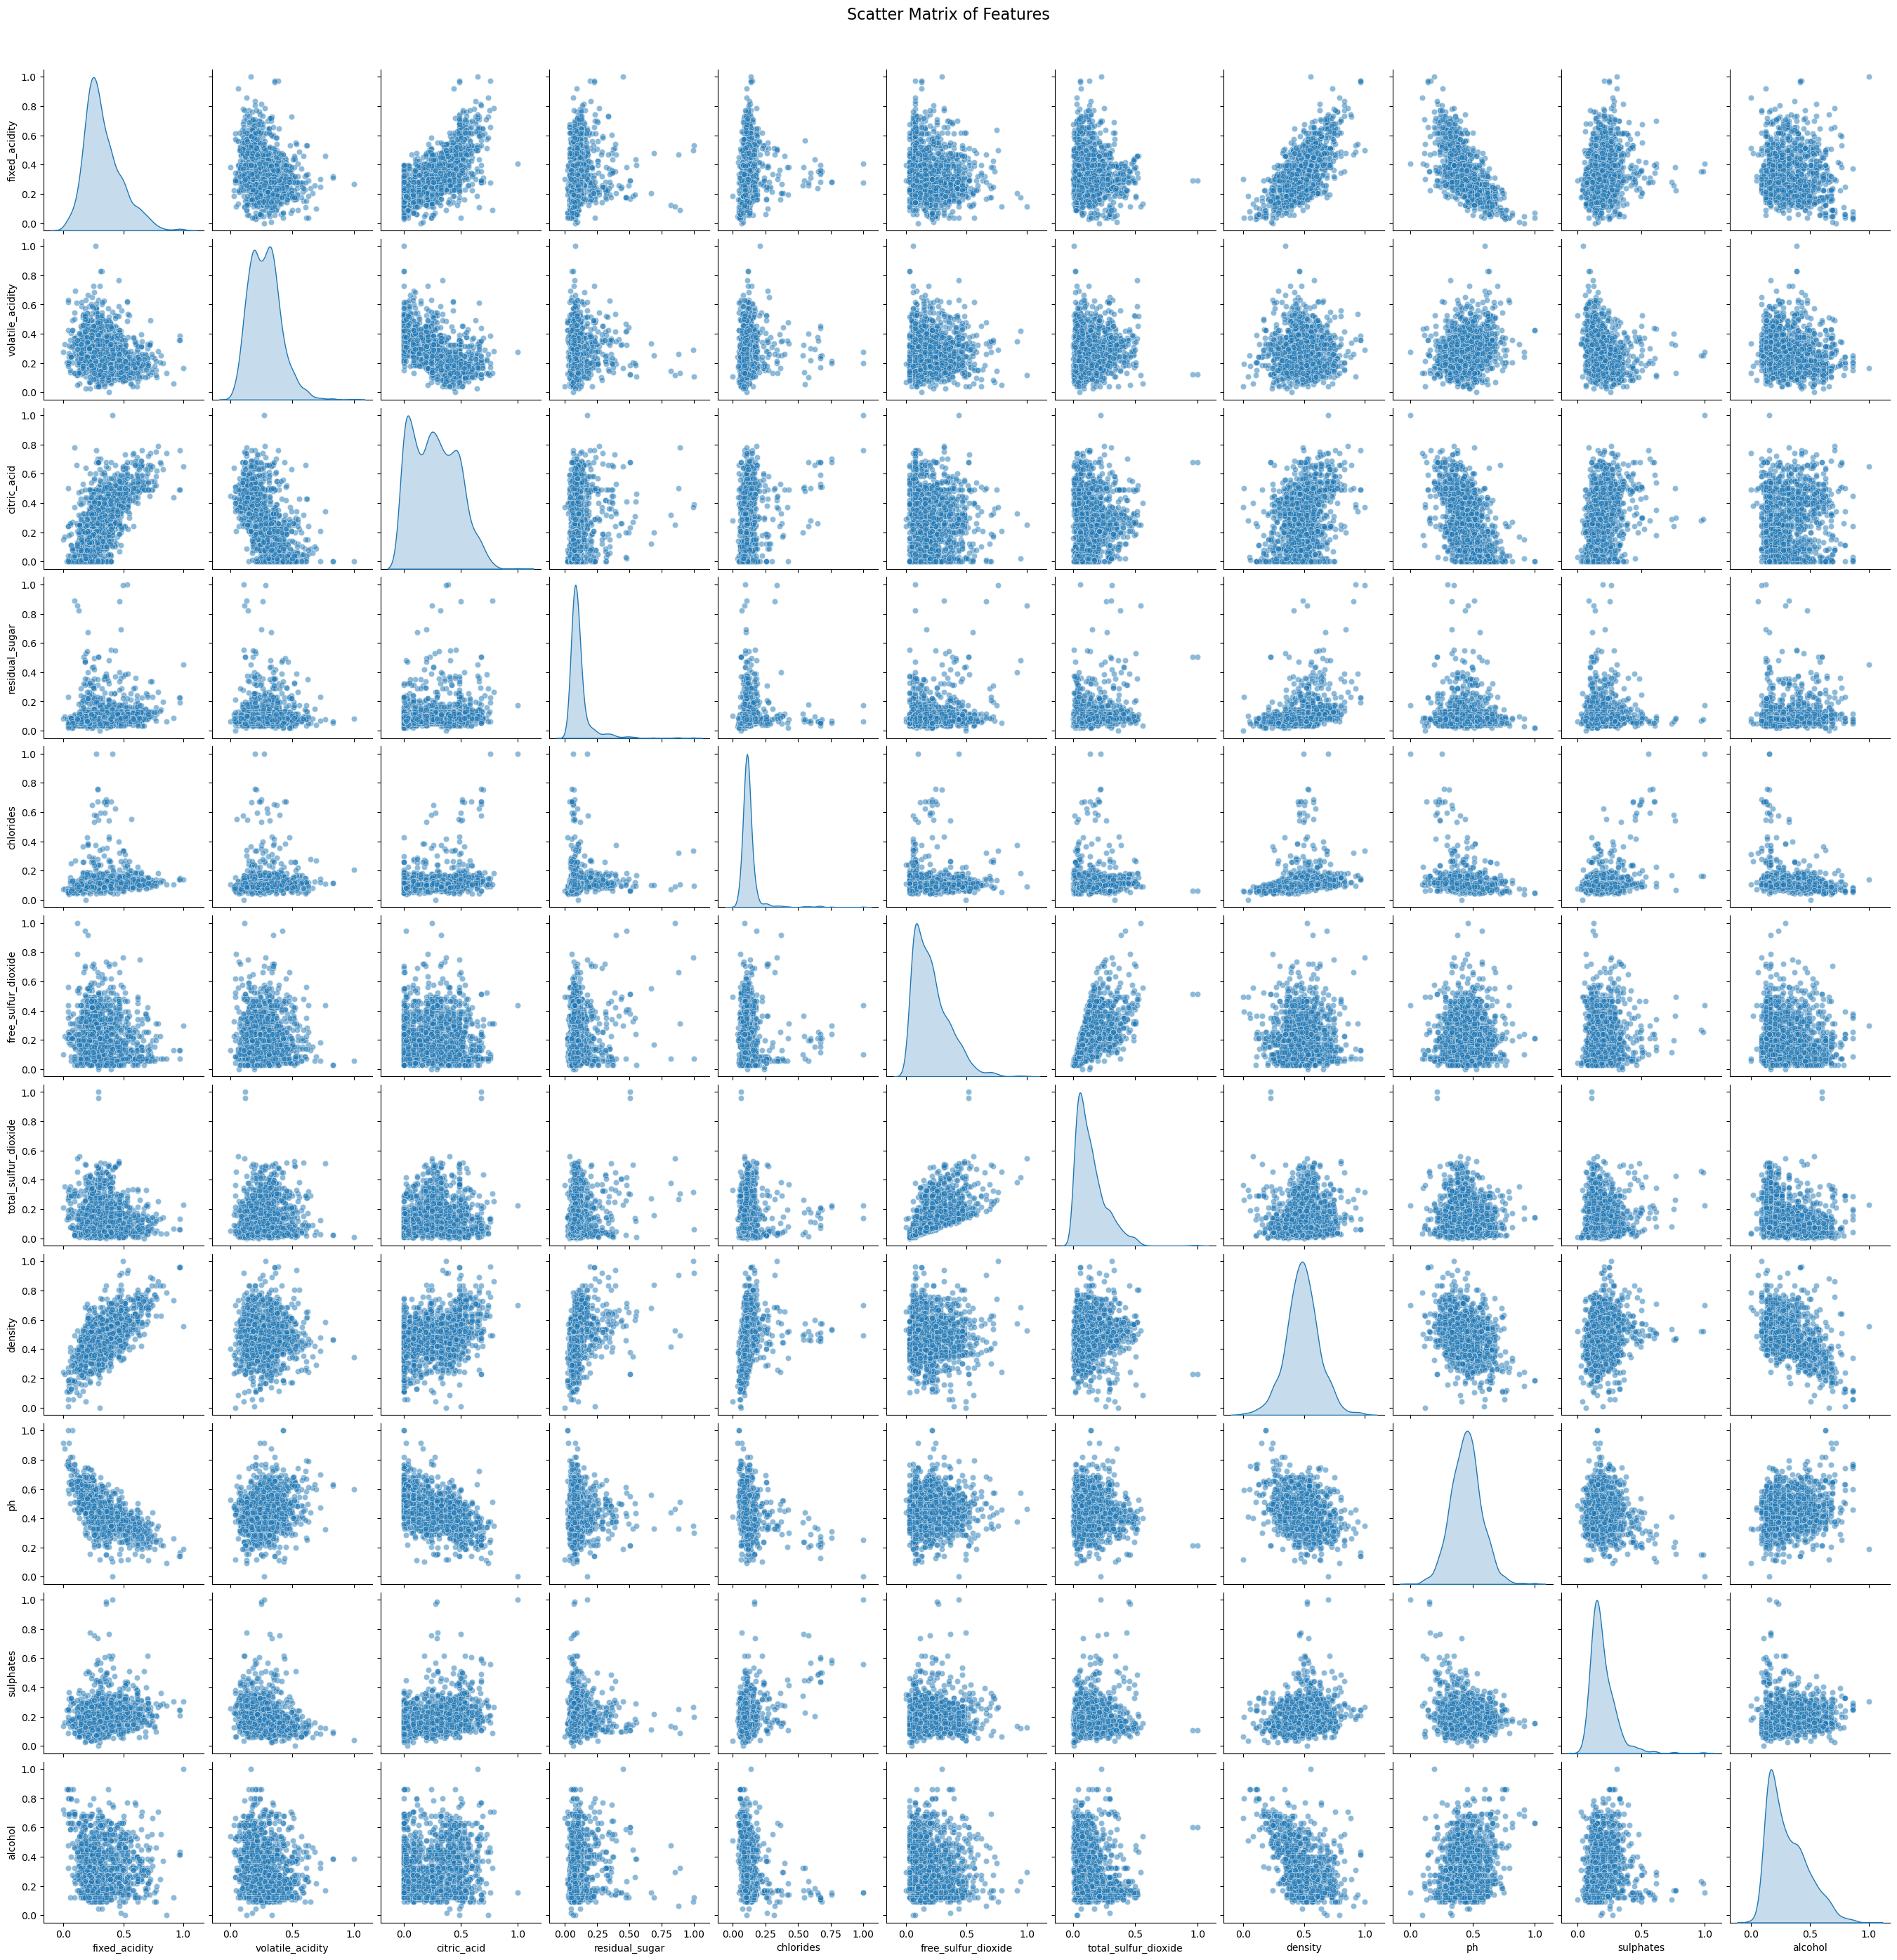

In [12]:
#scatter plot of pairs of features
def plot_scatter_matrix(X, features):
    sns.pairplot(X[features], diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})
    plt.suptitle('Scatter Matrix of Features', y=1.02, fontsize=16)
    plt.show()
plot_scatter_matrix(X, features)
  


## 3 Outliers

I am having a look at the scatter matrix of the variables to find out what is the amount of outliers that they have.

Some of the variables have a large amount of outliers. Below, I will use the IQR method to remove outliers \
BÔI ĐEN TOÀN BỘ, ẤN "CTRL+/" ĐỂ BẬT HÀM KHỬ IQR

In [ ]:
# df_reconstructed = pd.concat([X, y], axis=1)
# df = pd.concat([X.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

# def remove_outliers_iqr(df):
#     numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

#     for col in numeric_cols:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1

#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

#     return df

# # Gọi hàm để dfóa outliers
# #combine df and y
# df2 = remove_outliers_iqr(df)

# X = df2.drop("quality", axis=1)
# y = df2["quality"]

# print(f'Number of rows after removing outliers: {X.shape[0]}')

In [13]:
X

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.247788          0.397260         0.00        0.068493   0.106845   
1          0.283186          0.520548         0.00        0.116438   0.143573   
2          0.283186          0.438356         0.04        0.095890   0.133556   
3          0.584071          0.109589         0.56        0.068493   0.105175   
4          0.247788          0.369863         0.00        0.061644   0.105175   
...             ...               ...          ...             ...        ...   
1354       0.194690          0.342466         0.08        0.068493   0.093489   
1355       0.141593          0.328767         0.08        0.075342   0.130217   
1356       0.115044          0.294521         0.10        0.089041   0.083472   
1357       0.115044          0.359589         0.12        0.075342   0.105175   
1358       0.123894          0.130137         0.47        0.184932   0.091820   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
0                0.140845              0.098940  0.567548  0.606299   
1                0.338028              0.215548  0.494126  0.362205   
2                0.197183              0.169611  0.508811  0.409449   
3                0.225352              0.190813  0.582232  0.330709   
4                0.169014              0.120141  0.567548  0.606299   
...                   ...                   ...       ...       ...   
1354             0.380282              0.113074  0.472834  0.535433   
1355             0.436620              0.134276  0.354626  0.559055   
1356             0.535211              0.159011  0.370778  0.614173   
1357             0.436620              0.134276  0.396476  0.653543   
1358             0.239437              0.127208  0.397944  0.511811   

      sulphates   alcohol  
0      0.137725  0.153846  
1      0.209581  0.215385  
2      0.191617  0.215385  
3      0.149701  0.215385  
4      0.137725  0.153846  
...         ...       ...  
1354   0.293413  0.169231  
1355   0.149701  0.323077  
1356   0.257485  0.430769  
1357   0.227545  0.276923  
1358   0.197605  0.400000  

[1359 rows x 11 columns]

lets check the scatterplot matrix again

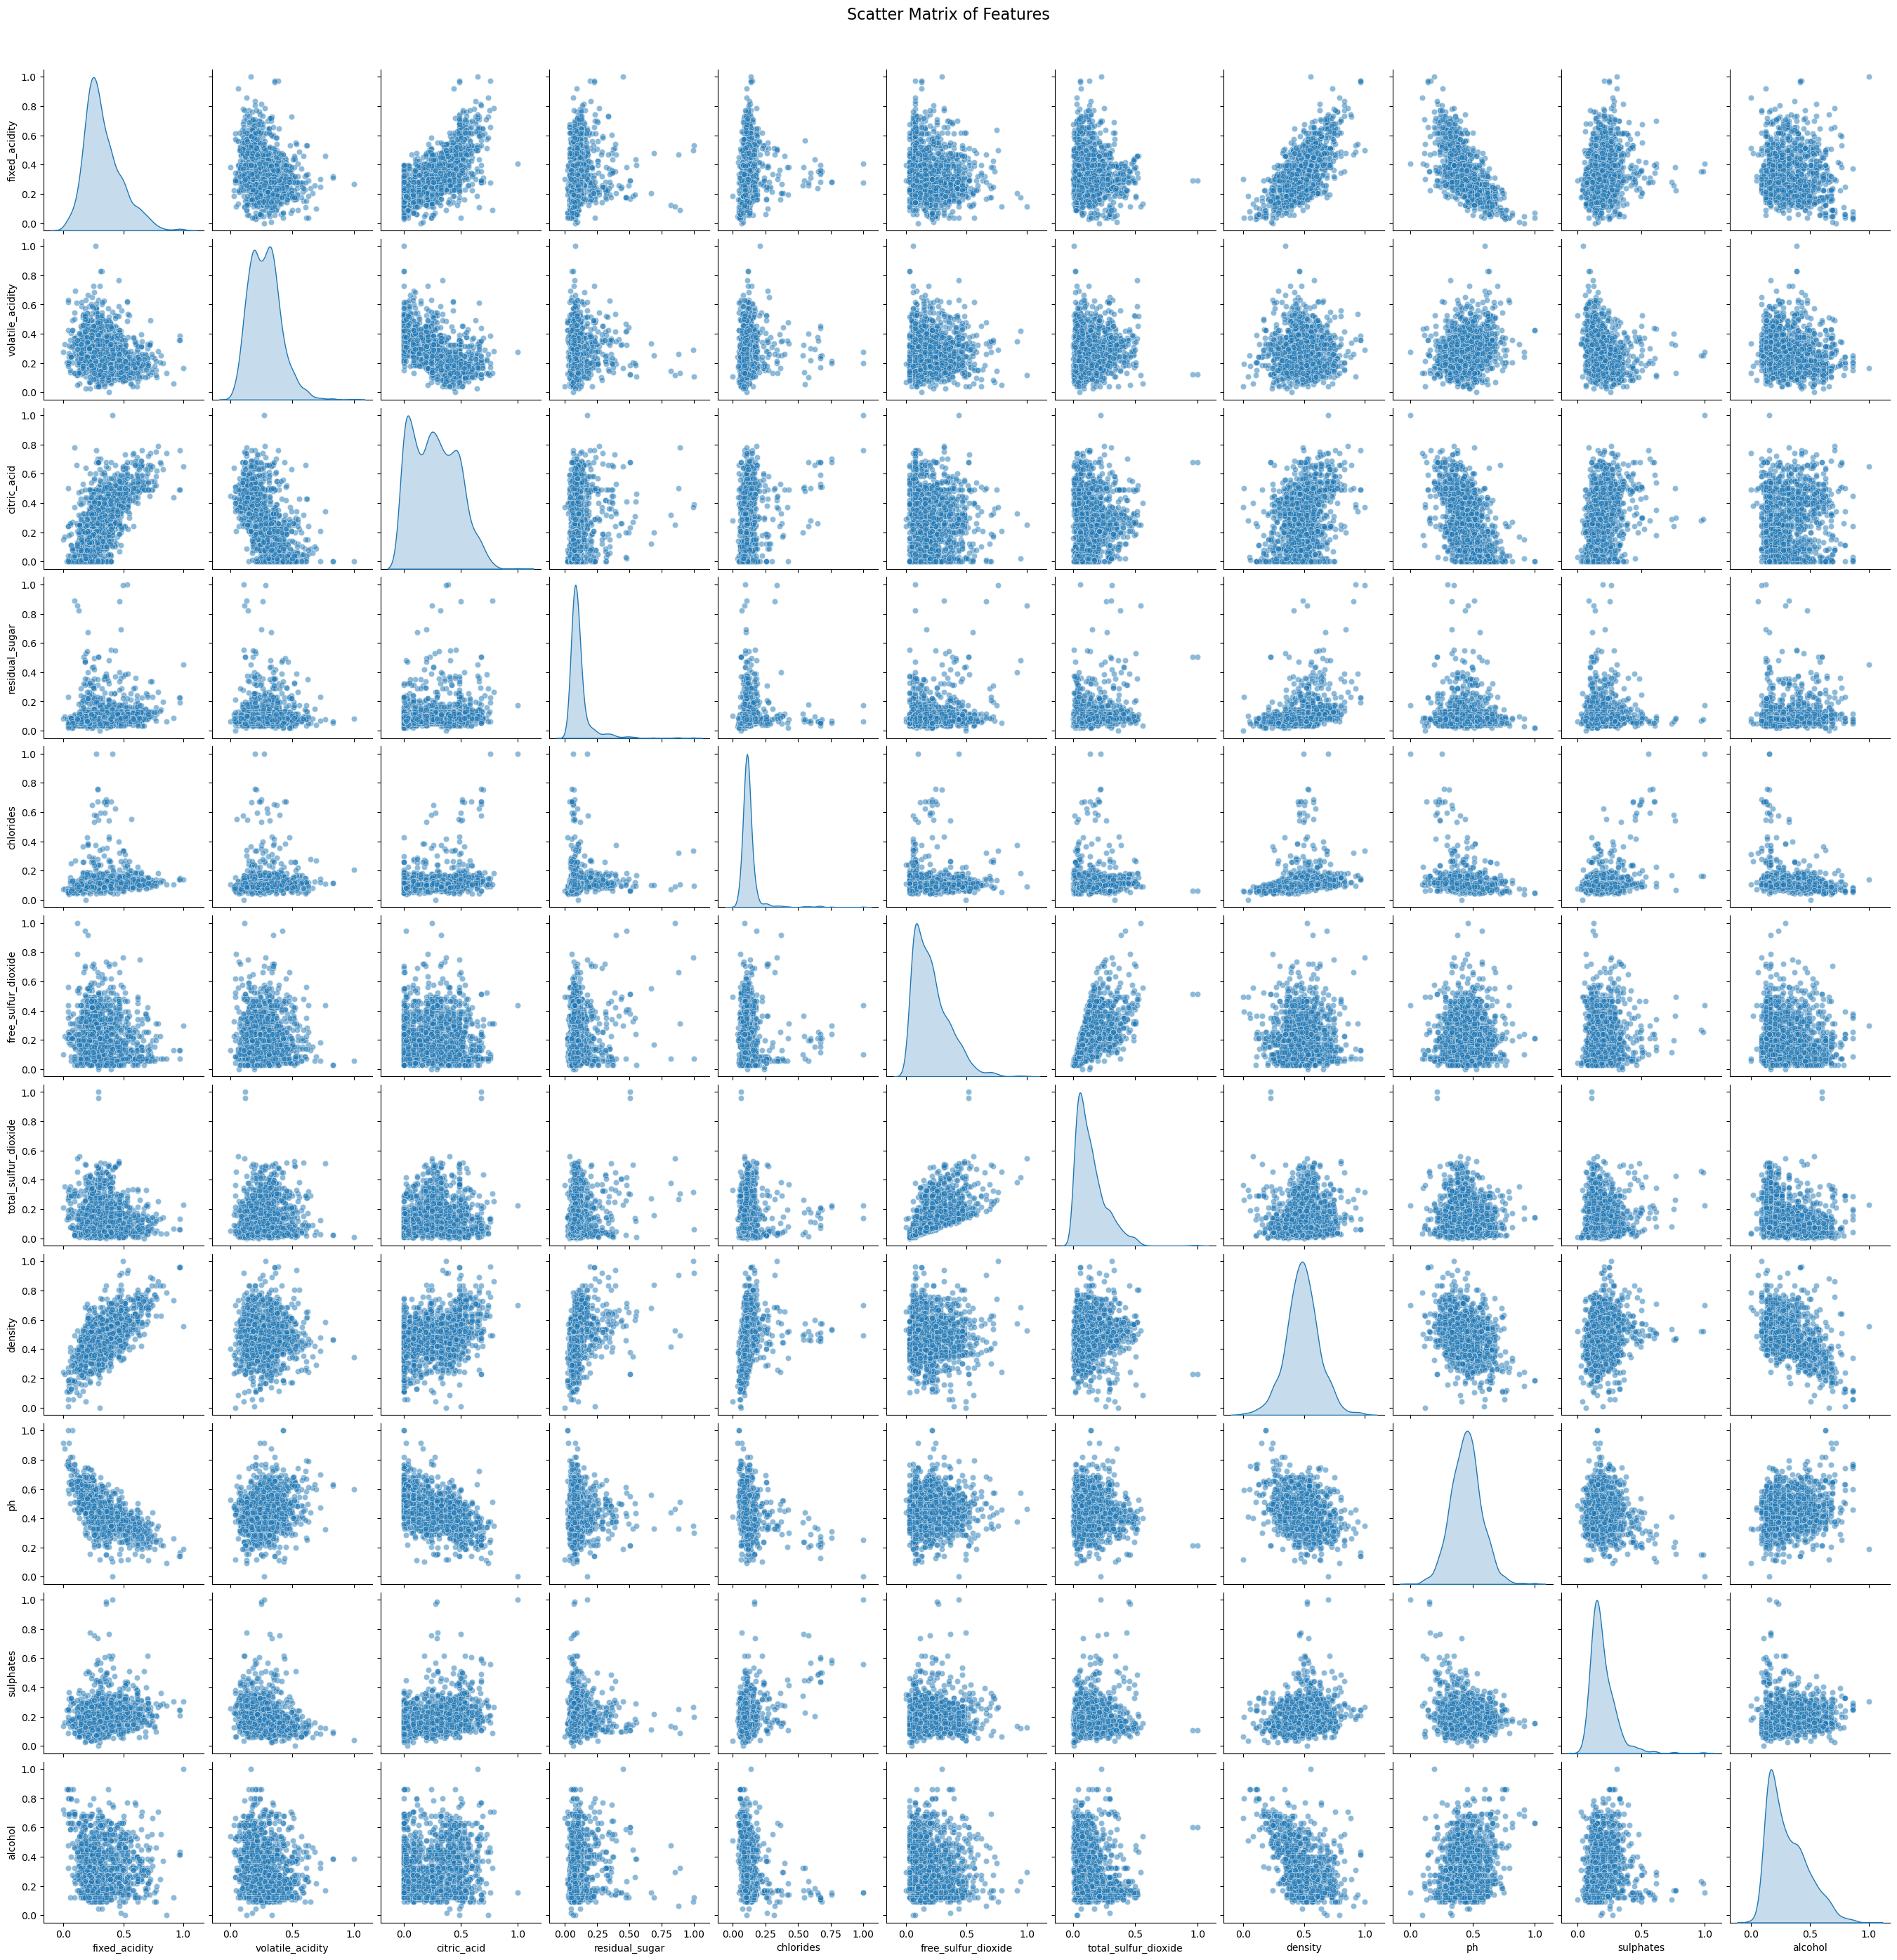

In [14]:
plot_scatter_matrix(X, features)

## 4 Train-Test Splitting


As a first step, I am defining the `X` and `y` variables.For this classification algorithm, i will define y as binary, if the quality is equal or higher than 7, it will count as good quality (1), and viceversa (0)

Then, I am shuffling X and y and performing the train-test splitting.

In [15]:
# Train-test splitting (3 target classes)
y = (y >= 7).astype(int)  # Binary classification: 1 = high quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
#show the shape of train and test set
print(f'Train set shape: {X_train.shape}, Test set shape: {X_test.shape}')
#show the distribution of target variable
print(f'Train set target distribution:\n{y_train.value_counts(normalize=True)}')

Train set shape: (1087, 11), Test set shape: (272, 11)
Train set target distribution:
quality
0    0.862006
1    0.137994
Name: proportion, dtype: float64


## 5 Training the model

In [16]:
clf = LogisticRegression(class_weight='balanced',max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

In [17]:
report

{'0': {'precision': 0.9742268041237113,
  'recall': 0.7941176470588235,
  'f1-score': 0.875,
  'support': 238.0},
 '1': {'precision': 0.3717948717948718,
  'recall': 0.8529411764705882,
  'f1-score': 0.5178571428571429,
  'support': 34.0},
 'accuracy': 0.8014705882352942,
 'macro avg': {'precision': 0.6730108379592916,
  'recall': 0.8235294117647058,
  'f1-score': 0.6964285714285714,
  'support': 272.0},
 'weighted avg': {'precision': 0.8989228125826063,
  'recall': 0.8014705882352942,
  'f1-score': 0.8303571428571429,
  'support': 272.0}}

In [18]:
import joblib
joblib.dump(clf, 'logistic-model.pkl')

['logistic-model.pkl']